In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('glassdor_data_cleaned.csv')
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Size,Founded,Type of ownership,Industry,Sector,Revenue,hourly_salary,min_salary,max_salary,avg_salary
0,Sr. Data Scientist,71-118\r\n,Medifast is seeking a full-time Senior Data Sc...,3.0,"Medifast, Inc.\r","Baltimore, MD",501 to 1000 Employees,1980.0,Company - Public,"Health, Beauty, & Fitness",Consumer Services,$500 million to $1 billion (USD),0,71,118,94.5
1,Scientist II,49-106\r\n,Scientist II*\r\nAs a Scientist II (SII) at In...,3.3,"Invivoscribe, Inc.\r","San Diego, CA",51 to 200 Employees,1995.0,Company - Private,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,$10 to $25 million (USD),0,49,106,77.5
2,Medical Laboratory Scientist,17-23 \r\n,Job Summary:\r\n\r\nPerforms and interprets te...,3.8,Cleveland Clinic\r,"Akron, OH",10000+ Employees,1921.0,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),1,34,46,40.0
3,IT Data Analyst,44-81\r\n,Federated Insurance is looking for a passionat...,3.8,Federated Mutual Insurance Company\r,"Owatonna, MN",1001 to 5000 Employees,1904.0,Company - Private,Insurance Carriers,Insurance,$1 to $2 billion (USD),0,44,81,62.5
4,Business Intelligence Analyst I,38-76\r\n,GreenState Credit Union\r\n\r\nBusiness Intell...,3.6,GreenState Credit Union\r,"North Liberty, IA",501 to 1000 Employees,1938.0,Nonprofit Organization,Banks & Credit Unions,Finance,$100 to $500 million (USD),0,38,76,57.0


In [3]:
df.shape

(491, 16)

In [4]:
df.isnull().sum()

Job Title             0
Salary Estimate       0
Job Description       0
Rating                1
Company Name          0
Location              0
Size                  0
Founded              28
Type of ownership     0
Industry              8
Sector                8
Revenue               0
hourly_salary         0
min_salary            0
max_salary            0
avg_salary            0
dtype: int64

## Job Title

In [5]:
df['Job Title'].value_counts().reset_index().set_index('index').head(20)

,Job Title
index,
Data Scientist,54
Data Engineer,18
Senior Data Scientist,11
Data Analyst,9
Machine Learning Engineer,7
Senior Business Intelligence Analyst,7
Business Intelligence Analyst,6
Senior Data Engineer,5
Sr. Data Scientist,4


In [6]:
def job_type(job_title):
    if 'data scientist' in job_title.lower():
        return 'data scientist'
    elif 'data science' in job_title.lower():
        return 'data scientist'
    elif 'data engineer' in job_title.lower():
        return 'data engineer'
    elif 'data analyst' in job_title.lower():
        return 'data analyst'
    elif 'business intelligence' in job_title.lower():
        return 'business intelligence'
    elif 'machine learning' in job_title.lower():
        return 'machine learning'
    else:
        return 'other'

In [7]:
df['job_type'] = df['Job Title'].apply(job_type)

In [8]:
df['job_type'].value_counts().reset_index().set_index('index').head(50)

,job_type
index,
data scientist,246
other,90
data analyst,61
data engineer,51
business intelligence,24
machine learning,19


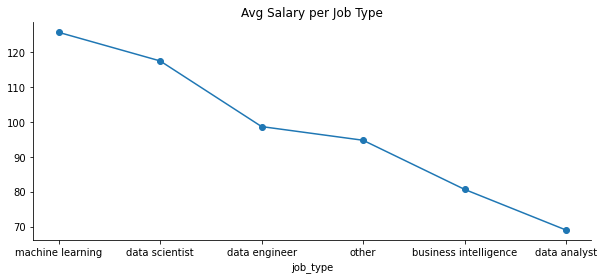

In [9]:
plt.figure(figsize=(10,4))
plt.title('Avg Salary per Job Type')
df.groupby(by=['job_type']).mean()['avg_salary'].sort_values(ascending = False).plot(kind='line', marker='o')
sns.despine()

In [10]:
def seniority(title):
    if 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    elif 'sr' in title.lower() or 'senior' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
        return 'senior'
    else:
        return 'other'

In [11]:
df['seniority'] = df['Job Title'].apply(seniority)

In [12]:
df['seniority'].value_counts().reset_index().set_index('index').head(50)

,seniority
index,
other,362
senior,110
manager,10
director,9


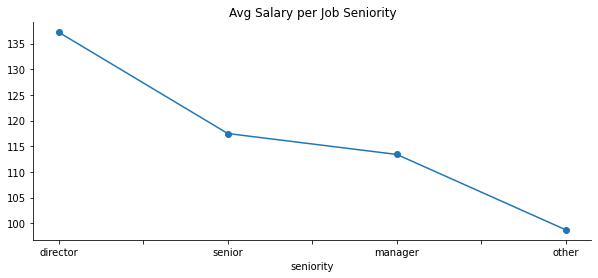

In [13]:
plt.figure(figsize=(10,4))
plt.title('Avg Salary per Job Seniority')
df.groupby(by=['seniority']).mean()['avg_salary'].sort_values(ascending = False).plot(kind='line', marker='o')
sns.despine()

## Job Description

In [14]:
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords

In [15]:
stop_words = set(stopwords.words('english'))
def clean_text(text):
    text = unidecode(text)
    text = re.sub('[^a-zA-Z]', '', text).lower()
    words = [w for w in text.split() if not w in stop_words]
    text = ' '.join(words)
    return text

In [16]:
df['cleaned_description'] = df['Job Description']

In [17]:
cv = CountVectorizer()
cv.fit(df['cleaned_description'].values)

CountVectorizer()

In [18]:
cv.vocabulary_

{'medifast': 6221,
 'is': 5446,
 'seeking': 8743,
 'full': 4311,
 'time': 9823,
 'senior': 8779,
 'data': 2718,
 'scientist': 8670,
 'to': 9852,
 'join': 5529,
 'our': 7037,
 'team': 9641,
 'the': 9743,
 'will': 10587,
 'be': 1226,
 'responsible': 8386,
 'for': 4186,
 'anticipating': 835,
 'future': 4345,
 'business': 1567,
 'needs': 6616,
 'solving': 9063,
 'real': 8061,
 'questions': 7968,
 'and': 792,
 'identifying': 4967,
 'new': 6658,
 'applications': 873,
 'complex': 2197,
 'analysis': 770,
 'candidate': 1640,
 'focus': 4162,
 'using': 10242,
 'machine': 6002,
 'learning': 5764,
 'following': 4172,
 'use': 10232,
 'cases': 1707,
 'at': 1035,
 'demand': 2853,
 'forecasting': 4192,
 'recommendation': 8105,
 'engines': 3566,
 'sentiments': 8794,
 'survival': 9514,
 'natural': 6583,
 'language': 5699,
 'processing': 7694,
 'ab': 344,
 'testing': 9725,
 'customer': 2672,
 'segmentation': 8747,
 'unsupervised': 10186,
 'employ': 3502,
 'statistical': 9267,
 'modeling': 6413,
 'generate

In [19]:
'''
requiremens for job:
    -SAS
    -XGBOOST
    -SCIKIT
    -PANDAS
    -AWS
    -REDSHIFT
    -APACHE
    -SPARK
    -HADOOP
    -NUMPY
    -SCIPY
    -PYSPARK
    -LINUX
    -JUPYTER
    -SQL
    -CLOUD
    -PYTHON
    -R
    -MATHEMATICS
    -STATISTICS
    -PHD
    -TABLEAU
'''

'\nrequiremens for job:\n    -SAS\n    -XGBOOST\n    -SCIKIT\n    -PANDAS\n    -AWS\n    -REDSHIFT\n    -APACHE\n    -SPARK\n    -HADOOP\n    -NUMPY\n    -SCIPY\n    -PYSPARK\n    -LINUX\n    -JUPYTER\n    -SQL\n    -CLOUD\n    -PYTHON\n    -R\n    -MATHEMATICS\n    -STATISTICS\n    -PHD\n    -TABLEAU\n'

In [20]:
df['sas_flag'] = df['Job Description'].apply(lambda x: 1 if 'sas' in x.lower() else 0)
df['xgboost_flag'] = df['Job Description'].apply(lambda x: 1 if 'xgboost' in x.lower() else 0)
df['scikit_flag'] = df['Job Description'].apply(lambda x: 1 if 'scikit' in x.lower() else 0)
df['pandas_flag'] = df['Job Description'].apply(lambda x: 1 if 'pandas' in x.lower() else 0)
df['aws_flag'] = df['Job Description'].apply(lambda x: 1 if 'aws' in x.lower() else 0)
df['redshift_flag'] = df['Job Description'].apply(lambda x: 1 if 'redshift' in x.lower() else 0)
df['apache_flag'] = df['Job Description'].apply(lambda x: 1 if 'apache' in x.lower() else 0)
df['spark_flag'] = df['Job Description'].apply(lambda x: 1 if 'spark' in x.lower() else 0)
df['hadoop_flag'] = df['Job Description'].apply(lambda x: 1 if 'hadoop' in x.lower() else 0)
df['numpy_flag'] = df['Job Description'].apply(lambda x: 1 if 'numpy' in x.lower() else 0)
df['scipy_flag'] = df['Job Description'].apply(lambda x: 1 if 'scipy' in x.lower() else 0)
df['pyspark_flag'] = df['Job Description'].apply(lambda x: 1 if 'pyspark' in x.lower() else 0)
df['linux_flag'] = df['Job Description'].apply(lambda x: 1 if 'linux' in x.lower() else 0)
df['jupyter_flag'] = df['Job Description'].apply(lambda x: 1 if 'jupyter' in x.lower() else 0)
df['sql_flag'] = df['Job Description'].apply(lambda x: 1 if 'sql' in x.lower() else 0)
df['cloud_flag'] = df['Job Description'].apply(lambda x: 1 if 'cloud' in x.lower() else 0)
df['python_flag'] = df['Job Description'].apply(lambda x: 1 if 'python' in x.lower() else 0)
df['phd_flag'] = df['Job Description'].apply(lambda x: 1 if 'phd' in x.lower() else 0)
df['tableau_flag'] = df['Job Description'].apply(lambda x: 1 if 'tableau' in x.lower() else 0)

In [21]:
columns = ['sas_flag','xgboost_flag','scikit_flag','pandas_flag','aws_flag','redshift_flag', \
           'apache_flag','spark_flag','hadoop_flag','numpy_flag','scipy_flag','pyspark_flag','linux_flag',\
           'jupyter_flag','sql_flag','cloud_flag','python_flag','phd_flag','tableau_flag']

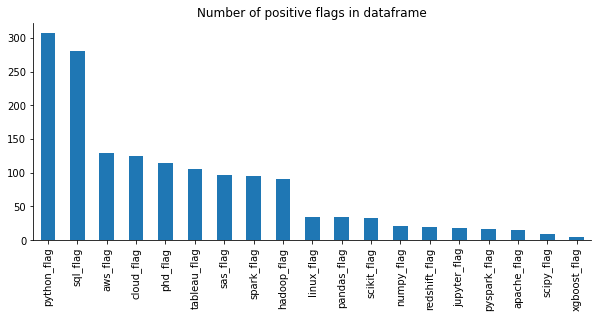

In [22]:
plt.figure(figsize=(10,4))
plt.title('Number of positive flags in dataframe')
df[columns].sum().sort_values(ascending=False).plot(kind='bar')
sns.despine()

In [23]:
1%3

1

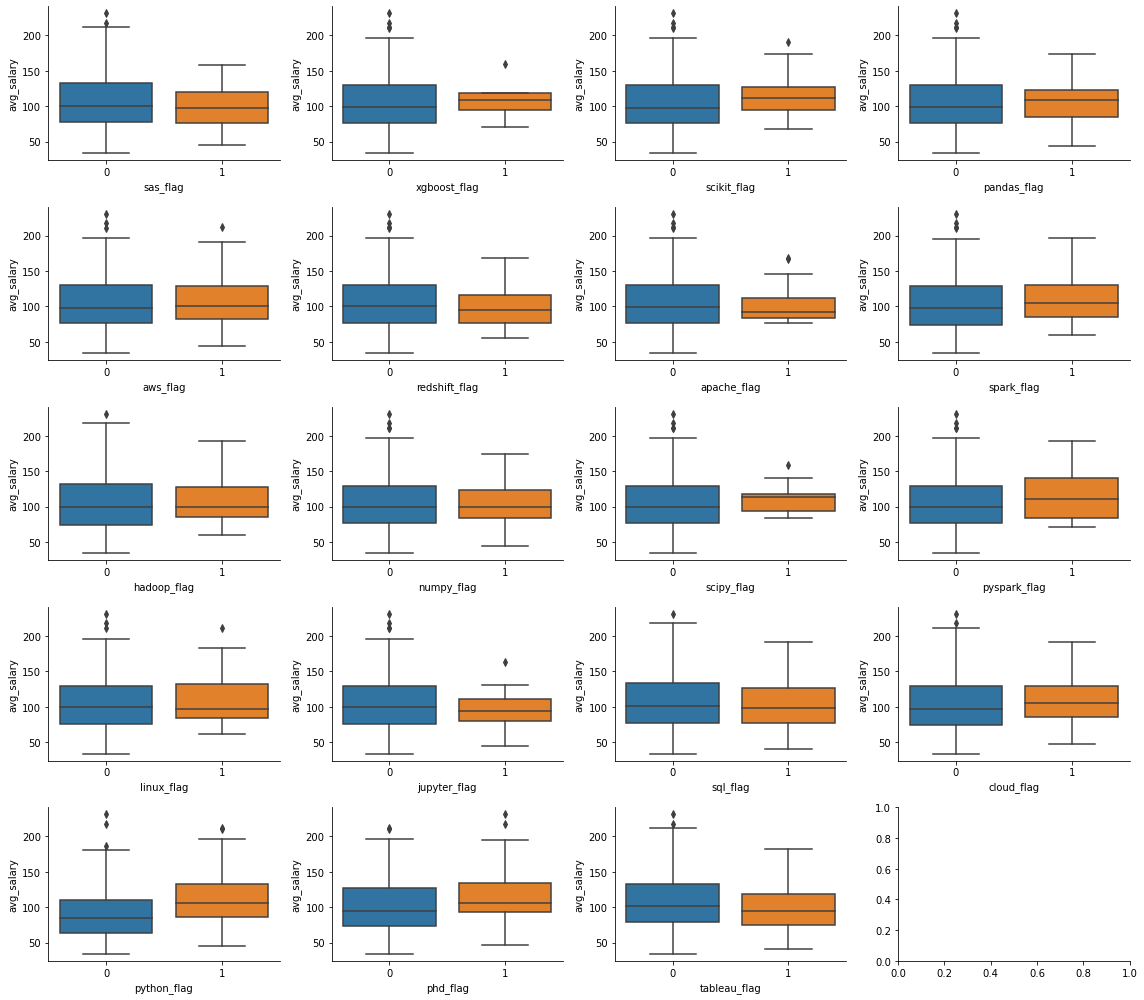

In [24]:
fig, axs = plt.subplots(nrows=5, ncols=4, figsize=(16,14))

for i, col in enumerate(columns):
    sns.boxplot(data=df, x=col, y='avg_salary', ax=axs[i//4,i%4])
    sns.despine()
    
fig.tight_layout()


## Rating

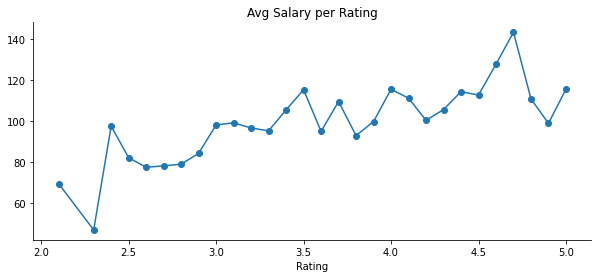

In [25]:
plt.figure(figsize=(10,4))
plt.title('Avg Salary per Rating')
df.groupby('Rating').mean()['avg_salary'].plot(kind='line', marker='o')
sns.despine()

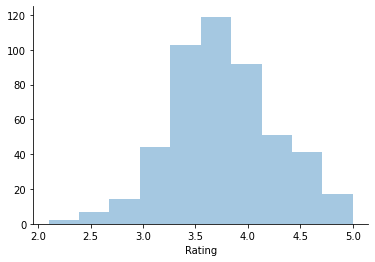

In [26]:
sns.distplot(df['Rating'], kde=False, bins=10)
sns.despine()

## Location

In [27]:
df['state'] = df['Location'].apply(lambda x: x.split(',')[1].strip())
df['city'] = df['Location'].apply(lambda x: x.split(',')[0].strip())

In [28]:
print( df.state.unique(), '\n\n', df.city.unique() )

['MD' 'CA' 'OH' 'MN' 'IA' 'MO' 'TX' 'MA' 'DC' 'NC' 'AK' 'WA' 'WI' 'NY'
 'ID' 'FL' 'IN' 'NJ' 'PA' 'IL' 'GA' 'VA' 'NE' 'CO' 'TN' 'SC' 'NM' 'CT'
 'OK' 'NH' 'UT' 'AZ' 'KY' 'KS' 'RI' 'AL' 'MI' 'WY' 'OR' 'Los Angeles'] 

 ['Baltimore' 'San Diego' 'Akron' 'Owatonna' 'North Liberty'
 'North Kansas City' 'Cedar Creek' 'Cambridge' 'Washington' 'Frederick'
 'Oakdale' 'Morrisville' 'Anchorage' 'Aberdeen Proving Ground' 'Bellevue'
 'Pleasant Prairie' 'Irvine' 'New York' 'Appleton' 'Chubbuck' 'Boston'
 'Miami Lakes' 'Sheboygan' 'Indianapolis' 'Ewing' 'Framingham'
 'Clearwater' 'Rockville' 'New Oxford' 'Evanston' 'Gainesville' 'Addison'
 'Arlington' 'Limerick' 'Hauppauge' 'Miami' 'Gurnee' 'Gaithersburg'
 'Omaha' 'Richland' 'Malvern' 'North Reading' 'Austin' 'Milwaukee'
 'Chevy Chase' 'Northbrook' 'Smithfield' 'Atlanta' 'Fort Washington'
 'Aurora' 'Chicago' 'Brentwood' 'Chantilly' 'Newark' 'Columbia' 'Danvers'
 'Alpharetta' 'Menlo Park' 'Bethesda' 'Alexandria' 'McLean' 'Columbus'
 'Annapolis Junction'

In [29]:
df[df['state'] == 'Los Angeles']['state'] = 'CA'

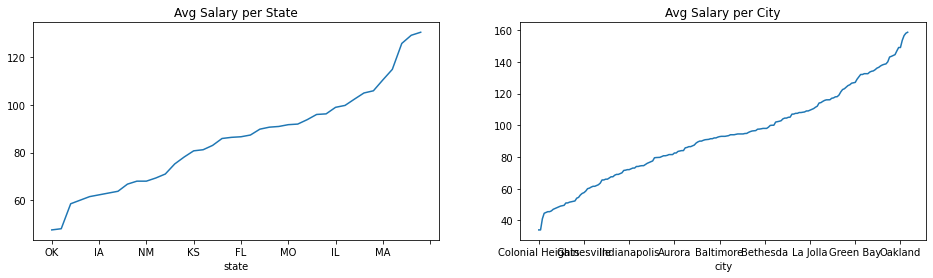

In [30]:
fig, axs = plt.subplots(1, 2, figsize=(16,4))

df.groupby(by=['state']).mean()['avg_salary'].sort_values().plot(ax=axs[0]);
df.groupby(by=['city']).mean()['avg_salary'].sort_values().plot(ax=axs[1]);
axs[0].set_title('Avg Salary per State');
axs[1].set_title('Avg Salary per City');

## Other

In [31]:
df.groupby('Size').mean()['avg_salary'].sort_values()

Size
1 to 50 Employees           87.075000
51 to 200 Employees         99.661290
10000+ Employees           103.811111
5001 to 10000 Employees    105.806452
201 to 500 Employees       105.864198
1001 to 5000 Employees     105.930000
501 to 1000 Employees      106.606557
Unknown                    132.500000
Name: avg_salary, dtype: float64

<AxesSubplot:xlabel='Founded'>

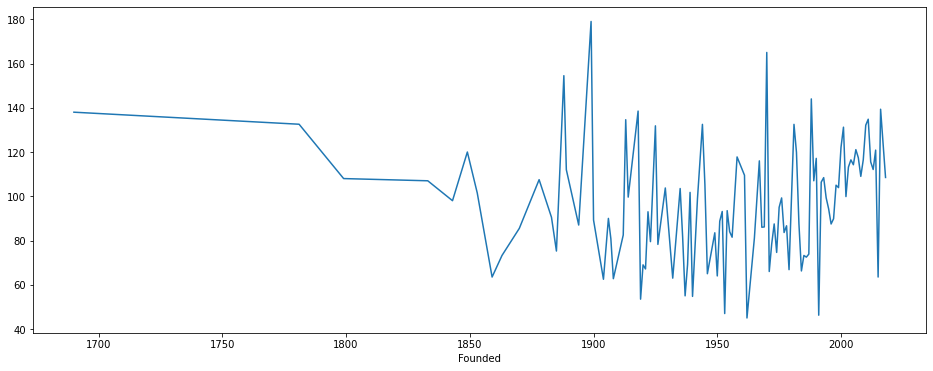

In [32]:
plt.figure(figsize=(16,6))
df.groupby('Founded').mean()['avg_salary'].plot()

In [33]:
df.groupby('Type of ownership').mean()['avg_salary'].sort_values()

Type of ownership
Hospital                           61.875000
College / University               62.000000
Other Organization                 66.250000
Government                         87.636364
Nonprofit Organization             88.486842
Subsidiary or Business Segment     94.882353
Company - Private                 104.805085
Contract                          109.500000
Company - Public                  110.847826
Private Practice / Firm           136.000000
Name: avg_salary, dtype: float64

In [34]:
df.groupby('Sector').mean()['avg_salary'].sort_values()

Sector
Mining & Metals                        55.000000
Construction, Repair & Maintenance     63.500000
Non-Profit                             66.000000
Education                              71.700000
Agriculture & Forestry                 74.500000
Health Care                            84.575758
Oil, Gas, Energy & Utilities           86.863636
Telecommunications                     87.250000
Insurance                              88.692308
Accounting & Legal                     94.000000
Media                                  94.000000
Consumer Services                      94.500000
Aerospace & Defense                    94.956522
Business Services                      95.521739
Manufacturing                          98.969697
Finance                               105.613636
Travel & Tourism                      112.500000
Government                            113.531250
Biotech & Pharmaceuticals             113.758929
Transportation & Logistics            116.333333
Information T

In [35]:
df.groupby('Revenue').mean()['avg_salary'].sort_values()

Revenue
Less than $1 million (USD)           85.375000
$50 to $100 million (USD)            90.435484
$500 million to $1 billion (USD)     93.661290
$5 to $10 million (USD)              95.250000
$2 to $5 billion (USD)               95.687500
$10 to $25 million (USD)             95.727273
$25 to $50 million (USD)             97.687500
$100 to $500 million (USD)          103.417808
$5 to $10 billion (USD)             106.517857
Unknown / Non-Applicable            108.471311
$10+ billion (USD)                  109.063291
$1 to $5 million (USD)              120.375000
$1 to $2 billion (USD)              122.565217
Name: avg_salary, dtype: float64

## 

In [36]:
df.to_csv('glassdor_data_eda.csv')

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Size,Founded,Type of ownership,Industry,...,pyspark_flag,linux_flag,jupyter_flag,sql_flag,cloud_flag,python_flag,phd_flag,tableau_flag,state,city
0,Sr. Data Scientist,71-118\r\n,Medifast is seeking a full-time Senior Data Sc...,3.0,"Medifast, Inc.\r","Baltimore, MD",501 to 1000 Employees,1980.0,Company - Public,"Health, Beauty, & Fitness",...,1,1,1,1,1,1,1,1,MD,Baltimore
1,Scientist II,49-106\r\n,Scientist II*\r\nAs a Scientist II (SII) at In...,3.3,"Invivoscribe, Inc.\r","San Diego, CA",51 to 200 Employees,1995.0,Company - Private,Biotech & Pharmaceuticals,...,0,0,0,0,0,0,1,0,CA,San Diego
2,Medical Laboratory Scientist,17-23 \r\n,Job Summary:\r\n\r\nPerforms and interprets te...,3.8,Cleveland Clinic\r,"Akron, OH",10000+ Employees,1921.0,Nonprofit Organization,Health Care Services & Hospitals,...,0,0,0,0,0,0,0,0,OH,Akron
3,IT Data Analyst,44-81\r\n,Federated Insurance is looking for a passionat...,3.8,Federated Mutual Insurance Company\r,"Owatonna, MN",1001 to 5000 Employees,1904.0,Company - Private,Insurance Carriers,...,0,0,0,1,0,0,0,0,MN,Owatonna
4,Business Intelligence Analyst I,38-76\r\n,GreenState Credit Union\r\n\r\nBusiness Intell...,3.6,GreenState Credit Union\r,"North Liberty, IA",501 to 1000 Employees,1938.0,Nonprofit Organization,Banks & Credit Unions,...,0,0,0,1,0,1,0,0,IA,North Liberty
